# VERITAS AI

An immersive Virtual AI program for ambitious high school students, founded and run by Harvard graduate students. For more information, see [Veritas AI](https://www.veritasai.com/).

<p align="center">
    <a href="https://www.veritasai.com/">
        <img src="https://images.squarespace-cdn.com/content/v1/61e9374e0434354049a258f9/f89e8510-6098-4747-a89e-0cd34fe13376/Veritas_Fellowship+MP+White+copy+2.png" width="400" height="400"/>
    </a>
</p>

## Content: All Slides and Codes

The links of the colabs for the code walkthrough of the first 8 weeks are listed below. **PLEASE DO NOT EDIT THE SCRIPT DIRECTLY. REMEMBER TO SAVE AS A COPY IF YOU WANT TO RUN THE CODE**

Section | Name | Links
--- | --- | ---
1 | **Intro to Basic Python, Numpy, and Pandas** | [Code](https://colab.research.google.com/drive/1z-0Z852bFOUNYhve0wbsCcRJCZpCqcqp?usp=sharing)
2 | **Exploratory Data Analysis** | [Code](https://colab.research.google.com/drive/1VaSC8CsBxAn5JcnN2I5g2YP1m9aWBBMO?usp=sharing)
3 | **Basics in Linear Regression** | [Code](https://colab.research.google.com/drive/1HC4netVsOZT1BHjyUNcu8u8f1Etfoi2b?usp=sharing)
4 | **Basics in Logistic Regression** | [Code](https://colab.research.google.com/drive/1lm5nv5ULZqJBklZJMyRonJGyk0sNjWGi?usp=sharing)
5 | **Intro to Neural Networks** | [Code](https://colab.research.google.com/drive/1OGxD35fQxXdWNDwYGYpZcES5zgo6UvdO?usp=sharing)
6 | **Intro to Convolutional Neural Networks** | [Code](https://colab.research.google.com/drive/1YAjTioD_wUuRIKhacUDpH2TC6HEOfV5u?usp=sharing)
7 | **More in Deep Neural Networks** | [Code](https://colab.research.google.com/drive/1uM7CzWPLifgf16aVtJhWeOGN6A0guvlv?usp=sharing)
8 | **Advanced Convolutional Neural Networks** | [Code](https://colab.research.google.com/drive/1duxfMW5sQbx91c0BJWiP2oSHVdtcbtND?usp=sharing)

REMEMBER: **PLEASE DO NOT EDIT THE SCRIPT DIRECTLY. REMEMBER TO SAVE AS A COPY IF YOU WANT TO RUN THE CODE**


# Credit Card Approval

![image](https://www.canstar.com.au/wp-content/uploads/2017/09/Credit-card-default-1.jpg)

Commercial banks receive millions of applications for credit cards annually, and are tasked with rating “creditworthiness” to applicants, sorting them into piles based on default risk. This might be based on high loan balances, low reported incomes, or suffering credit reports. Given the tedious and biased nature of manually reviewing each report, this is an obvious space for automation, which helps returns faster answers for clients minus personal bias. Help to build an automatic credit card approval score using ML techniques, just like real credit institutions have deployed, and identify any systemic biases that might need to be protected across.

- Algorithms: Linear Regression, Ridge Regression, LASSO, Random Forest.

- Difficulty: Moderate. A clean dataset has been provided here as a suggested starting point. High degree of flexibility in terms of approach.

Read more from [here](https://www.investopedia.com/applying-for-a-credit-card-your-odds-of-being-approved-4684901).

# Load data

In [ ]:
# General packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
import sklearn.model_selection as skms


In [ ]:
# Load data
!kaggle datasets download -d samuelcortinhas/credit-card-classification-clean-data
!mkdir -p content/sample_data/credit_card_approval_dataset
!unzip -o credit-card-classification-clean-data.zip -d content/sample_data/credit_card_approval_dataset

data = pd.read_csv("content/sample_data/credit_card_approval_dataset/clean_data.csv")

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/credit-card-classification-clean-data
License(s): CC0-1.0
  0% 0.00/296k [00:00<?, ?B/s]
100% 296k/296k [00:00<00:00, 31.5MB/s]
Archive:  credit-card-classification-clean-data.zip
  inflating: content/sample_data/credit_card_approval_dataset/clean_data.csv  


In [ ]:
# Preview
display(data.head())

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


# Data description

Features:

- ID: Client ID;
- Gender: Gender (1 = Male, 0 = Female);
- Own_car: Does client own a car? (1 = Yes, 0 = No);
- Own_property: Does client own property? (1 = yes, 0 = No);
- Work_phone: Does client own a work phone? (1 = yes, 0 = No);
- Phone: Does client own a phone? (1 = yes, 0 = No);
- Email: Does client have an email address? (1 = yes, 0 = No);
- Unemployed: Is client unemployed? (1 = yes, 0 = No);
- Num_children: Number of children;
- Num_family: Number of family members;
- Account_length: Number of months credit card has been owned;
- Total_income: Total income (chinese yuan);
- Age: Age in years;
- Years_employed: Number of years employed;
- Income_type: Income type;
- Education_type: Education type;
- Family_status: Family status;
- Housing_type: Housing type;
- Occupation_type: Occupation type;
- Target: Target (1=high risk, 0 = low risk).

In [ ]:
# Summary of the data
print("Data types:"); print(data.dtypes)
print("\nDataset statistics:"); data.describe().transpose()

Data types:
ID                   int64
Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int64
Account_length       int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Occupation_type     object
Target               int64
dtype: object

Dataset statistics:


,count,mean,std,min,25%,50%,75%,max
ID,9709.0,5.076105e+06,40802.696053,5.008804e+06,5.036955e+06,5.069449e+06,5.112986e+06,5.150479e+06
Gender,9709.0,3.487486e-01,0.476599,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Own_car,9709.0,3.677001e-01,0.482204,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Own_property,9709.0,6.715419e-01,0.469677,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Work_phone,9709.0,2.174271e-01,0.412517,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Phone,9709.0,2.876712e-01,0.452700,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Email,9709.0,8.754764e-02,0.282650,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Unemployed,9709.0,1.746833e-01,0.379716,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Num_children,9709.0,4.228036e-01,0.767019,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
Num_family,9709.0,2.182614e+00,0.932918,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01


In [ ]:
# What do you see from this correlation matrix?
display(data.corr(numeric_only = True))

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
ID,1.000000,0.014427,-0.003829,-0.071906,0.067723,0.005400,-0.025062,-0.029437,0.021149,0.015102,-0.005465,-0.003212,-0.040211,-0.019097,0.000384
Gender,0.014427,1.000000,0.355420,-0.056067,0.059095,-0.019123,0.006548,-0.168753,0.054211,0.078460,-0.008431,0.200750,-0.173157,-0.028231,0.015033
Own_car,-0.003829,0.355420,1.000000,-0.010190,0.029406,0.004253,0.022261,-0.145493,0.089565,0.138548,0.025058,0.221874,-0.127670,0.019096,-0.006787
Own_property,-0.071906,-0.056067,-0.010190,1.000000,-0.184285,-0.052136,0.056014,0.086675,-0.000480,0.008782,-0.009627,0.025562,0.134602,-0.021443,-0.028227
Work_phone,0.067723,0.059095,0.029406,-0.184285,1.000000,0.288331,-0.040473,-0.242499,0.052890,0.062499,0.015013,-0.030854,-0.180719,0.107966,-0.002919
Phone,0.005400,-0.019123,0.004253,-0.052136,0.288331,1.000000,0.007631,0.000066,-0.023997,-0.013669,0.021386,0.021051,0.044856,0.041816,-0.009461
Email,-0.025062,0.006548,0.022261,0.056014,-0.040473,0.007631,1.000000,-0.081081,0.010271,0.004601,-0.024376,0.092321,-0.110262,-0.004703,0.007184
Unemployed,-0.029437,-0.168753,-0.145493,0.086675,-0.242499,0.000066,-0.081081,1.000000,-0.224611,-0.212479,0.005605,-0.166422,0.617513,-0.410936,-0.024926
Num_children,0.021149,0.054211,0.089565,-0.000480,0.052890,-0.023997,0.010271,-0.224611,1.000000,0.889970,-0.009064,0.031950,-0.322574,0.039159,0.011715
Num_family,0.015102,0.078460,0.138548,0.008782,0.062499,-0.013669,0.004601,-0.212479,0.889970,1.000000,0.012132,0.028992,-0.275471,0.055838,0.007077


## Define Research Question

What question will you try to answer? Write your project goal in the form of a question to help guide the steps that follow.

In [ ]:
# Before proceeding, we need to separate-out the test set from our data. We will not be touching the test set until the very end.
# Note the use of the "stratify" option: this is related to imbalance in the target of the data; see the EDA questions.

data_train, data_test = skms.train_test_split(data, test_size=0.1, random_state=0, stratify = data["Target"] )

## EDA

We include below a few plots to visualise the data. Take some time to analyse them.

Furthermore, you should ask questions about the data. For example:
- What proportion of clients are high-risk vs low-risk (ie, target = 1 vs 0), and what does the difference in sizes of the two aforementioned populations tell you?
- How is this related to the decision to use stratified sampling in the above train-val-test splitting?
- What are the characteristic features of the high-risk population? You can redo the plots above just for them.
- Would it be sensible to do feature transformation? For instance, perhaps the logarithm of Total_income might be more informative than the raw value.

In [ ]:
# Identify the numerical features
cols_numeric =  ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed', 'Income_type']

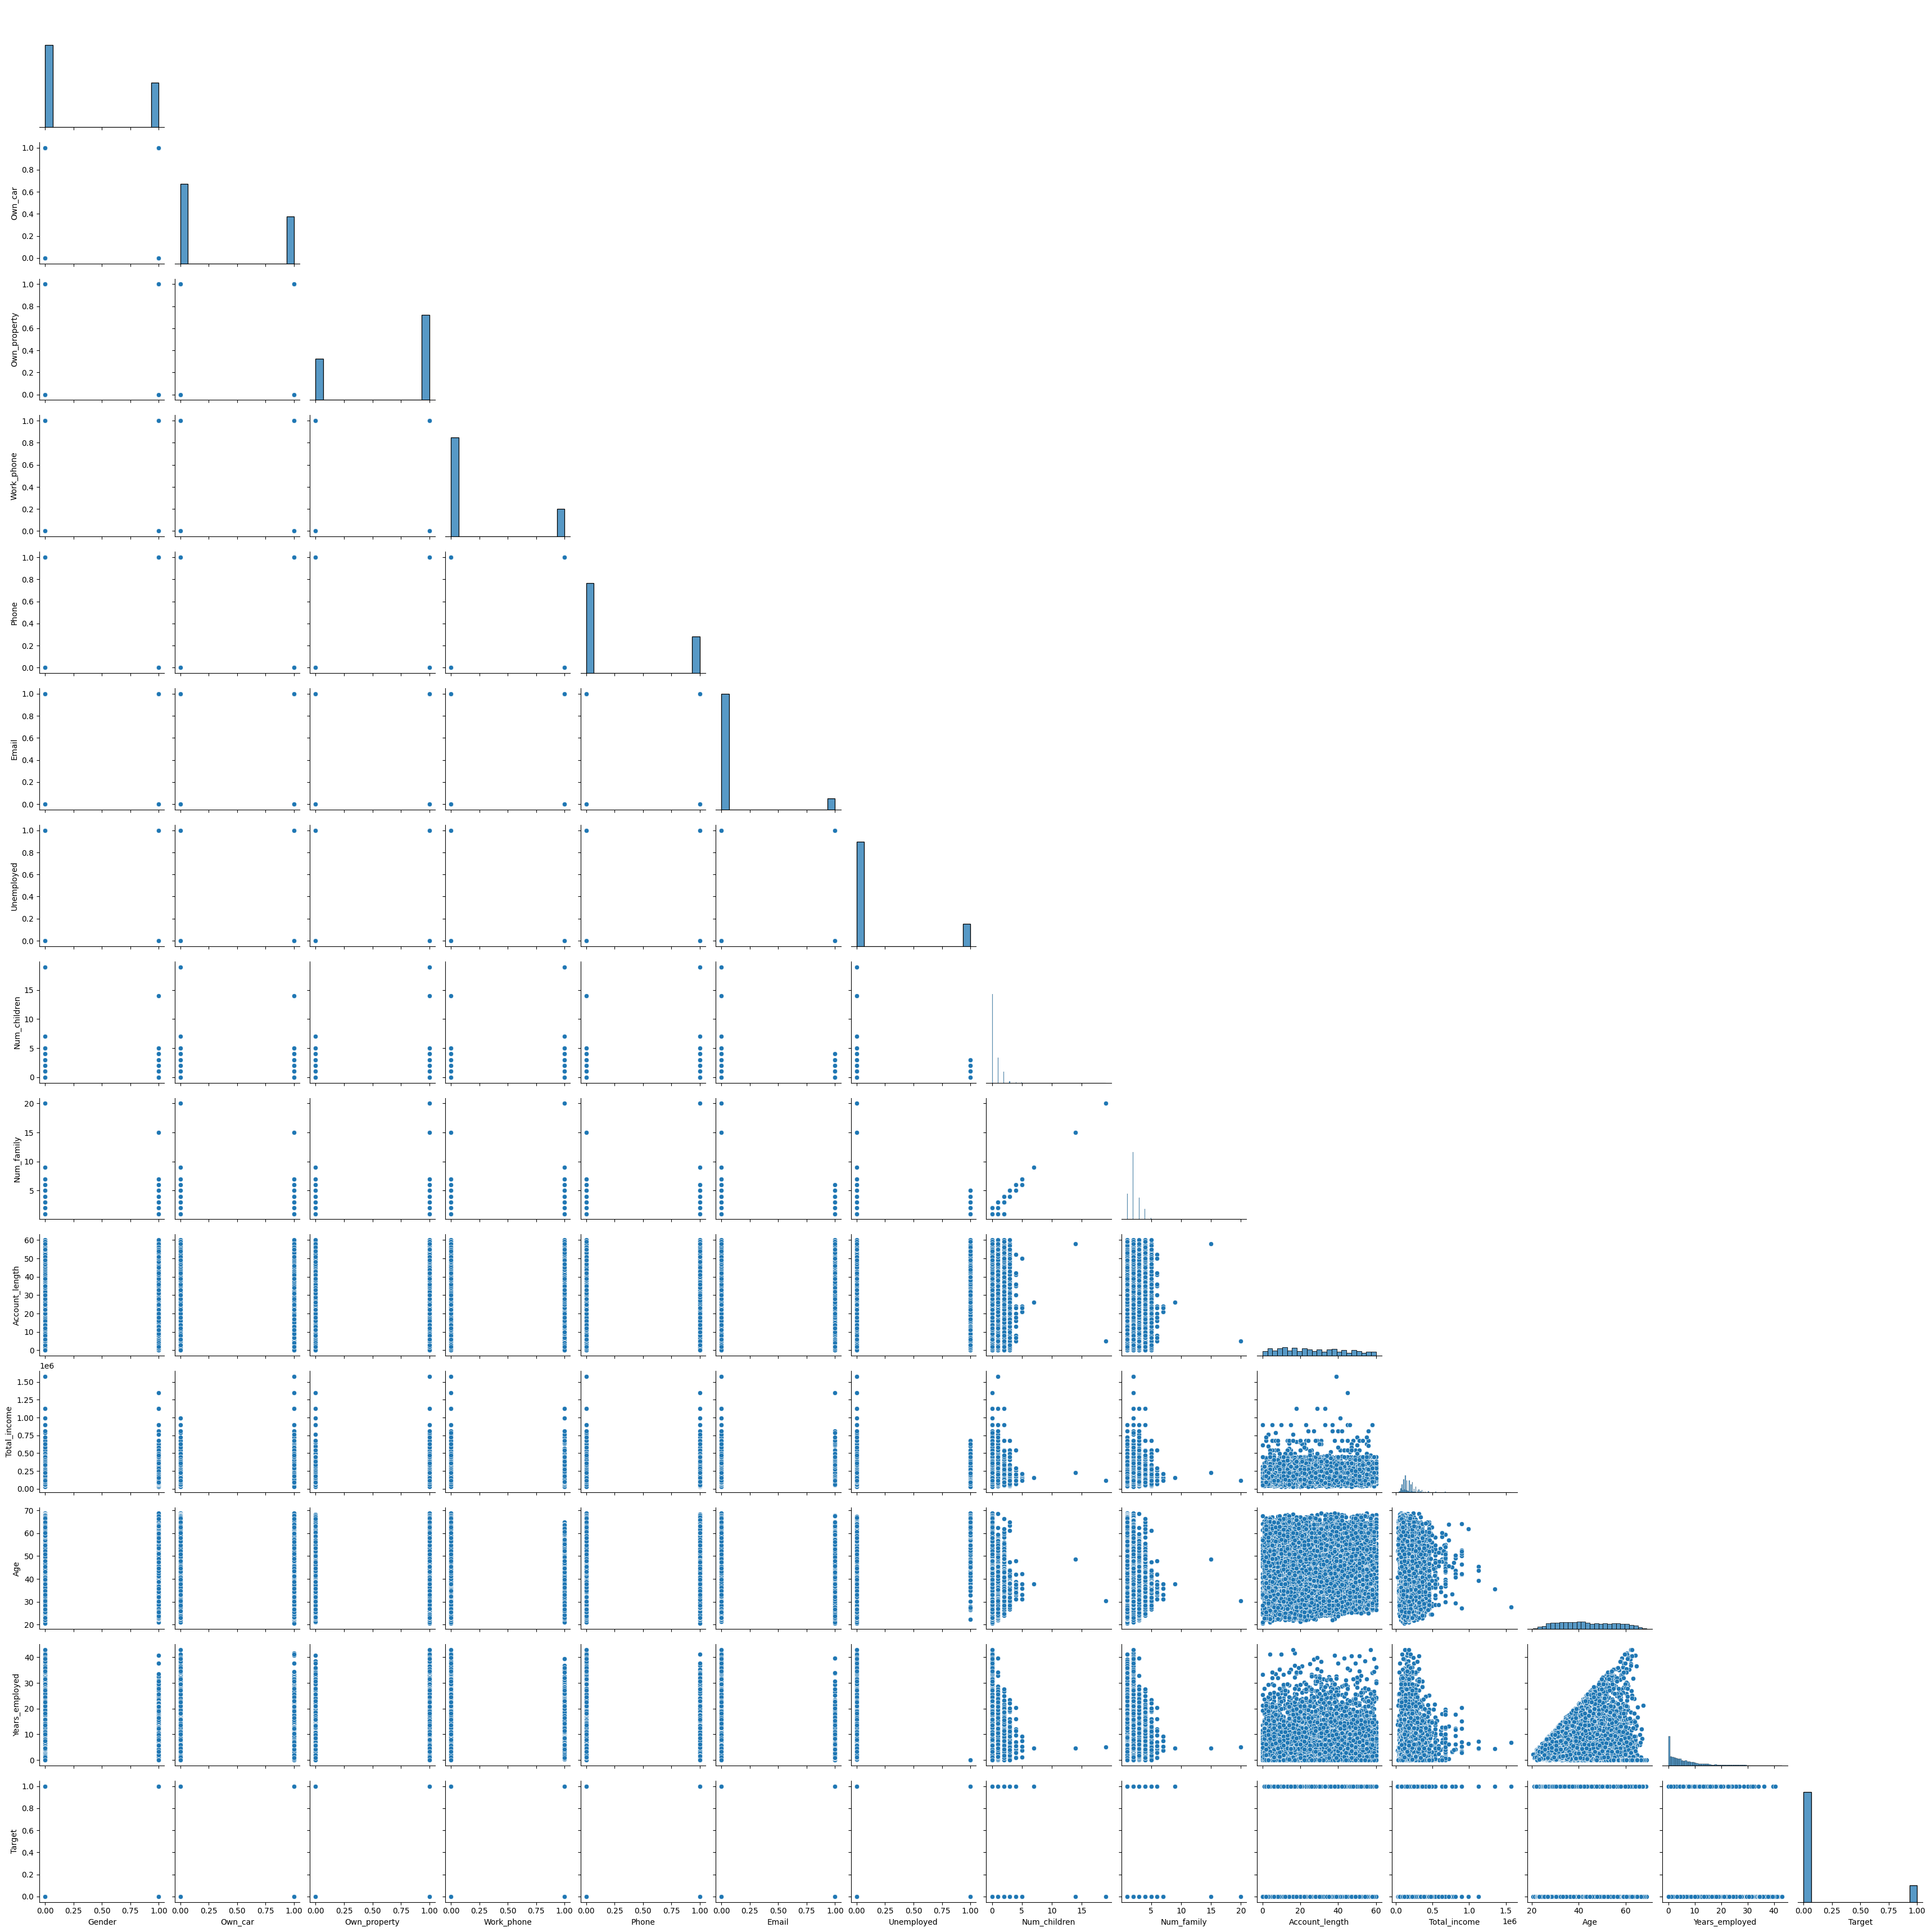

In [ ]:
# Corner-plot: this will produce scatter-plots between different variables and
# histogram plots of the variables along the outer, right edge
sns.pairplot(data_train[cols_numeric + ["Target"]], corner = True, diag_kind = "hist")
plt.show()

In [ ]:
# Identify the categorical features
cols_categ =  ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

# These need to be encoded numerically before you can run ML models. How would you do this: One-hot encoding or label encoding?
# What are the costs/benefits of each? After performing the encoding, you can also try visualising them

#... code goes here ...

## Baseline Model

Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results.

# To do:

1) Separate training and testing sets

2) Create a traditional machine learning model for classification. You can refer to the logistic regression course that we discussed in the lecture earlier.

3) Plot your training and testing accuracy by using different features. Notice that in the beginning we define $X$ to be a selection of certain columns. You can change those columns.


## Challenge:

- Can you create an algorithm to screen though the features automatically to produce the best subset selection?
- Consider the ethical and legal implications of using features like gender, age and number of children for deciding on who gets a credit card and who doesn't.


In [ ]:
# To start off, define target and features:
y_train = data_train["Target"]
y_test  = data_test["Target"]
X_train = data_train.iloc[:, 1:-1]
X_test  = data_test.iloc[:, 1:-1]

# Do train-validation split. Use the validation set to tweak your ML model (do not touch the test set until the very end)
X_train, X_val, y_train, y_val = skms.train_test_split(X_train, y_train, test_size=0.2/0.9, random_state=0, stratify = y_train)

# Display shapes
print("(Datapoints, num features) of train, val & test sets: ",X_train.shape, X_val.shape, X_test.shape)
display(X_train.head())

(Datapoints, num features) of train, val & test sets:  (6796, 18) (1942, 18) (971, 18)


,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type
6075,1,0,1,0,0,0,0,0,2,50,157500.0,48.121454,3.329295,Working,Secondary / secondary special,Married,House / apartment,Laborers
4575,1,1,1,1,0,0,0,0,2,26,173250.0,44.553961,6.466936,Working,Secondary / secondary special,Civil marriage,House / apartment,Drivers
6769,0,1,1,1,0,0,0,0,2,1,135000.0,36.280006,10.510825,Working,Secondary / secondary special,Married,House / apartment,Accountants
8223,1,0,1,0,0,0,0,1,3,14,112500.0,50.361061,14.113911,Working,Secondary / secondary special,Married,House / apartment,Laborers
1474,1,1,1,0,0,1,0,0,2,47,225000.0,41.068605,3.058242,Commercial associate,Higher education,Married,House / apartment,Managers


## Advanced Model

Examples:
- Try out an xgboost model (see [here](https://xgboost.readthedocs.io/en/stable/python/)), or random forest model (which you can load-in from sklearn).
- You can also try building a neural network model that is more complex or can improve upon your predictions for classification. Code examples are [here](https://colab.research.google.com/drive/1OGxD35fQxXdWNDwYGYpZcES5zgo6UvdO?authuser=1) for reference.

## Model Tuning

Recall in Week 5, we discussed hyperparameters tuning. You can refer to this code [here](https://colab.research.google.com/drive/1BdW6zSQ2XAUcLI83CANcFBQaBw5WgepK).

## Now predict on the test set#
Get your model performance by computing various statistics such as accuracy and true/false positives/negatives. Critically apparise your model and compare the test accuracy to validation and training accuracies.

## Performance Summary

Make a presentation of your result. You can refer to the syntax below.

Markdown | Preview
--- | ---
`**Model 1**` | **Model 2**
`*70%*` or `_italicized text_` | *90%*
`` `Monospace` `` | `Monospace`
`~~strikethrough~~` | ~~strikethrough~~
`[A link](https://www.google.com)` | [A link](https://www.google.com)
`![An image](https://www.google.com/images/rss.png)` | ![An image](https://www.google.com/images/rss.png)

More resources about creating tables in markdown of colab can be found [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk).

## Interpretation and Future Work

Present and also interpret your experimental performance. Comment on potential future work or research questions that your project leads to.